# 머신러닝 서포트벡터머신 - SVR

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [0]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('/content/drive/My Drive/gold/data')

In [0]:
# 데이터 불러오기
gold = pickle.load(open('gold_price.pkl','rb'))

In [0]:
# colums 확인
gold.keys()

Index(['USD/T.oz', 'index_price', 'index_volume', 'index_change', 'cny/krw',
       'usd/krw', '100jpy/krw', 'eur/krw', 'gbp/krw', 'nasdaq_volume',
       'kospi_volume', 'dow_volume', 'snp500_volume', 'WTI_barrel', 'nasdaq',
       'kospi', 'dow', 'snp500'],
      dtype='object')

In [0]:
# 사용할 데이터 추출
feature = gold.loc[:, ['index_price', 'cny/krw', 'usd/krw', '100jpy/krw', 'eur/krw', 'gbp/krw', 'nasdaq', 'kospi', 'dow', 'snp500']]

In [0]:
# scale
scaler = StandardScaler()
scaler.fit(feature)
X_scaled = scaler.transform(feature)
X_scaled = pd.DataFrame(X_scaled)

In [0]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, gold['USD/T.oz'], shuffle=False, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1608, 10), (690, 10), (1608,), (690,))

# gridsearch
kernel='rbf'

In [0]:
# 모델 정의
svr = SVR(kernel='rbf')
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100],
              'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]}

In [0]:
svr_cv = GridSearchCV(svr, param_grid, cv=5)
svr_cv.fit(X_train, y_train)
print("최상의 교차 검증 정확도: {:.2f}".format(svr_cv.best_score_))
print("test set score: {:.2f}".format(svr_cv.score(X_test, y_test)))
print("최적의 매개변수:", svr_cv.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


최상의 교차 검증 정확도: -1.73
test set score: 0.44
최적의 매개변수: {'C': 100, 'epsilon': 10, 'gamma': 0.01}


In [0]:
# 모델 fit
svr_best = SVR(**svr_cv.best_params_)
svr_best.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=10, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# train data 확인
train_pred = svr_best.predict(X_train)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


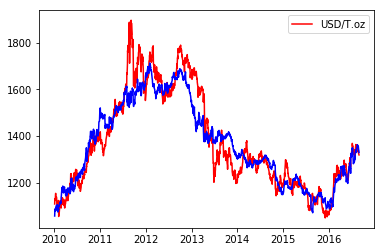

In [0]:
# 그래프로 확인
plt.plot(gold.index[:1608], y_train, c='r')
plt.plot(gold.index[:1608], train_pred, c='b')
plt.legend()
plt.show()

In [0]:
# 모델 예측
pred = svr_best.predict(X_test)

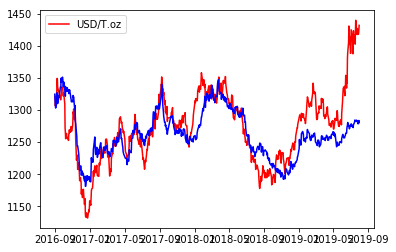

In [0]:
plt.plot(gold.index[1608:], y_test, c='r')
plt.plot(gold.index[1608:], pred, c='b')
plt.legend()
plt.show()

In [0]:
# r2
r2 = r2_score(y_test, pred)
print('r2: {:.3f}'.format(r2))
# rmse
rmse = mean_squared_error(y_test, pred)**0.5
print('rmse: {:.3f}'.format(rmse))
# mae
mae = mean_absolute_error(y_test, pred)
print('mae: {:.3f}'.format(mae))

r2: 0.445
rmse: 41.083
mae: 29.692


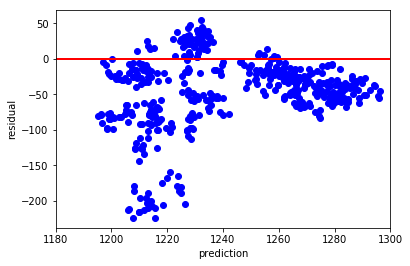

In [0]:
# 잔차 확인
plt.scatter(pred, pred-y_test, c='blue', marker='o')
plt.xlabel('prediction')
plt.ylabel('residual')
plt.hlines(y=0, xmin=900, xmax=1500, lw=2, color='red')
plt.xlim([1180, 1300])
plt.show()